In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [25]:
data= pd.read_pickle(r'C:\Users\remyd\Desktop\HEC\Master II\QARM\Project\sentratio_and_price_closetoclose_adj2.pkl')
data['date'] = pd.to_datetime(data['date'])                                
data = data.set_index('date')  

In [26]:
data

,ticker,Nbullish,Nbearish,N,Polarity,Agreement,VOL,adjprice,daily_return,medianN,phi,Event,total_vol_tweet,businessday,N_adj,Nbullish_adj,Nbearish_ajd,total_vol_tweet_ajd
date,,,,,,,,,,,,,,,,,,
2010-01-04 00:00:00+00:00,AAPL,14.0,0.0,21.0,0.655172,0.187767,18241224.0,30.572856,0.015555,NaN,NaN,False,471.0,True,21.0,19.0,0.0,471.0
2010-01-05 00:00:00+00:00,AAPL,24.0,3.0,30.0,0.567568,0.176673,22082278.0,30.625714,0.001729,NaN,NaN,False,392.0,True,30.0,24.0,3.0,392.0
2010-01-06 00:00:00+00:00,AAPL,18.0,5.0,29.0,0.393939,0.080864,20396105.0,30.138571,-0.015906,NaN,NaN,False,628.0,True,29.0,18.0,5.0,628.0
2010-01-07 00:00:00+00:00,AAPL,13.0,4.0,21.0,0.333333,0.057191,17628746.0,30.082857,-0.001849,NaN,NaN,False,521.0,True,21.0,13.0,4.0,521.0
2010-01-08 00:00:00+00:00,AAPL,16.0,1.0,18.0,0.555556,0.168521,16553861.0,30.282857,0.006648,NaN,NaN,False,502.0,True,18.0,16.0,1.0,502.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-17 00:00:00+00:00,UVXY,283.0,76.0,410.0,0.560976,0.172168,NaN,NaN,NaN,NaN,NaN,False,122261.0,True,410.0,283.0,76.0,122261.0
2020-03-18 00:00:00+00:00,UVXY,286.0,73.0,407.0,0.577236,0.183422,NaN,NaN,NaN,NaN,NaN,False,123331.0,True,407.0,286.0,73.0,123331.0
2020-03-19 00:00:00+00:00,UVXY,286.0,124.0,475.0,0.385714,0.077382,NaN,NaN,NaN,NaN,NaN,False,134495.0,True,475.0,286.0,124.0,134495.0


Plot Polarity, daily return for each ticker

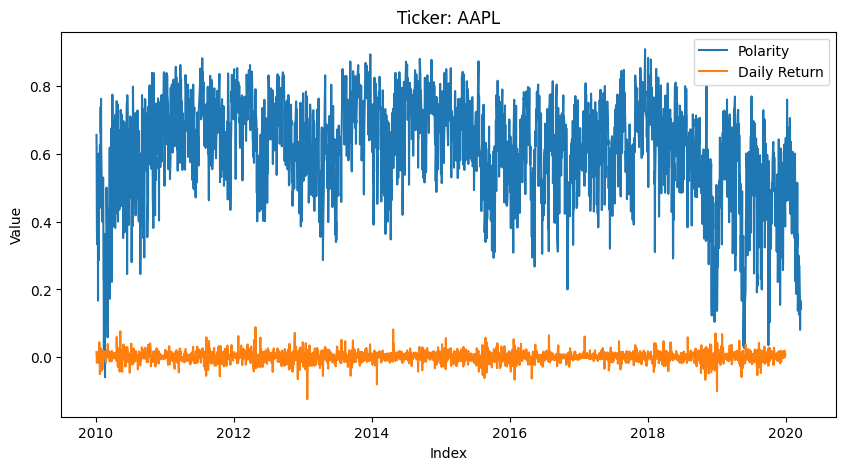

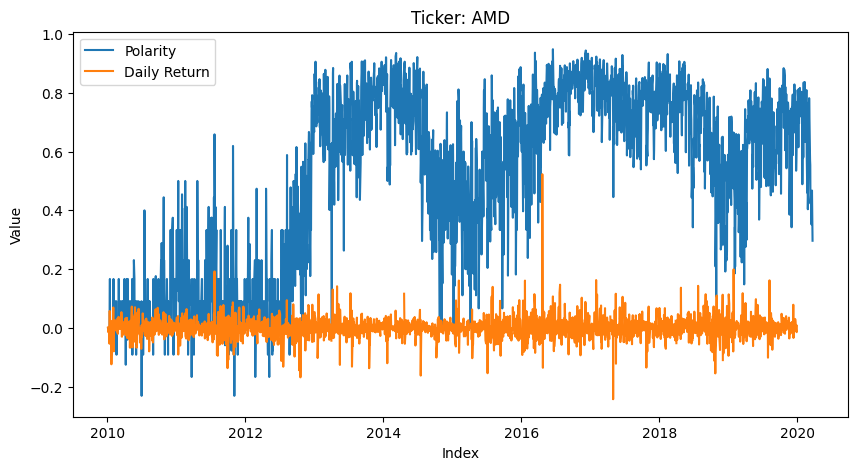

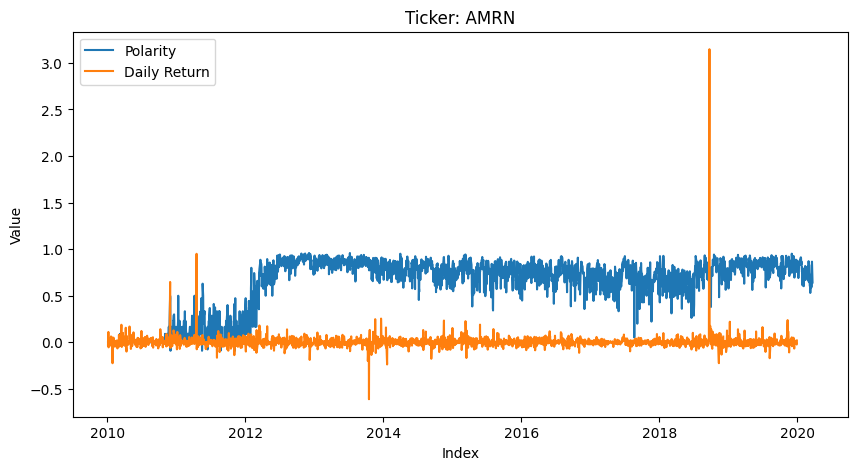

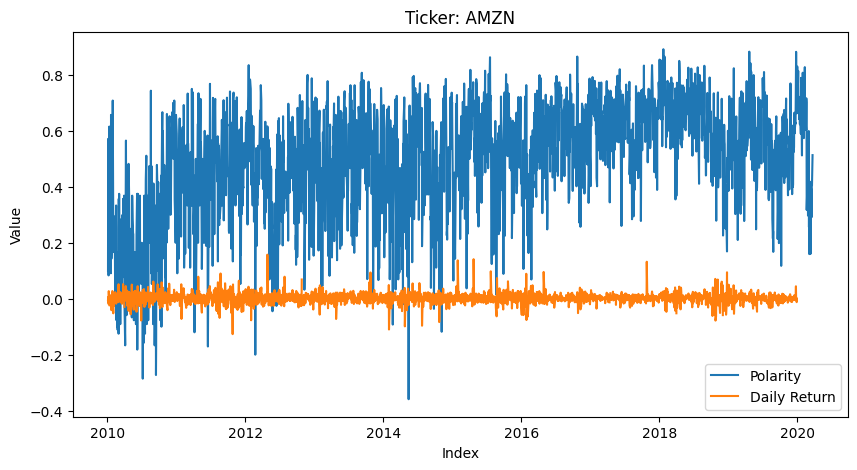

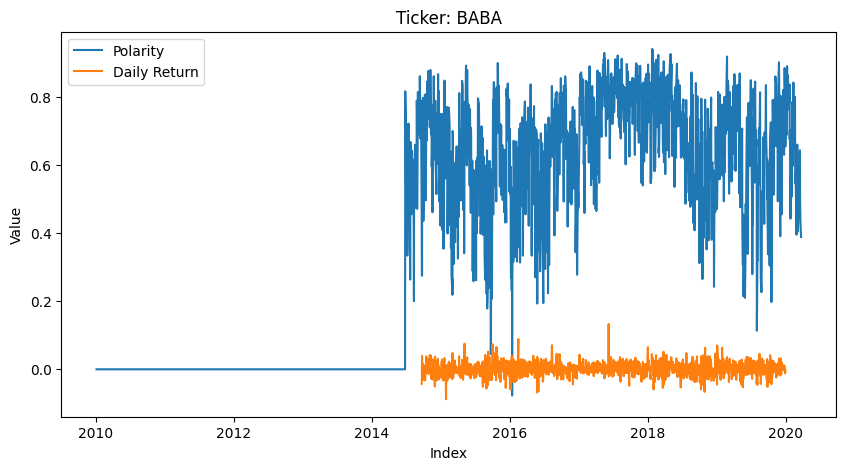

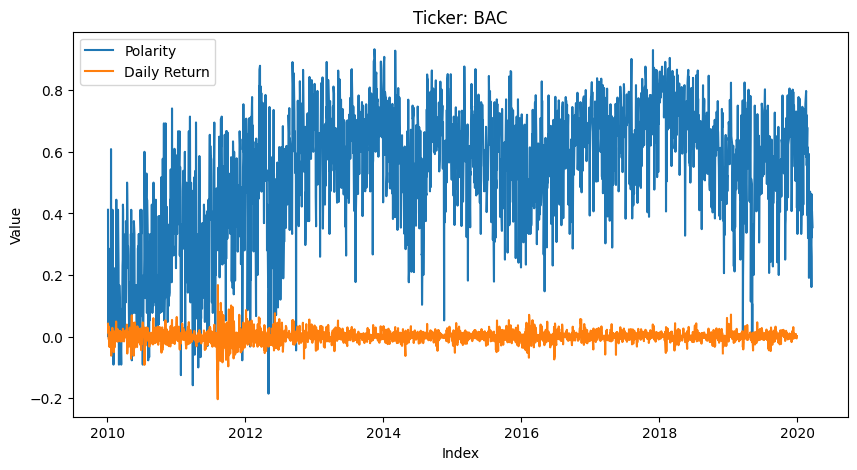

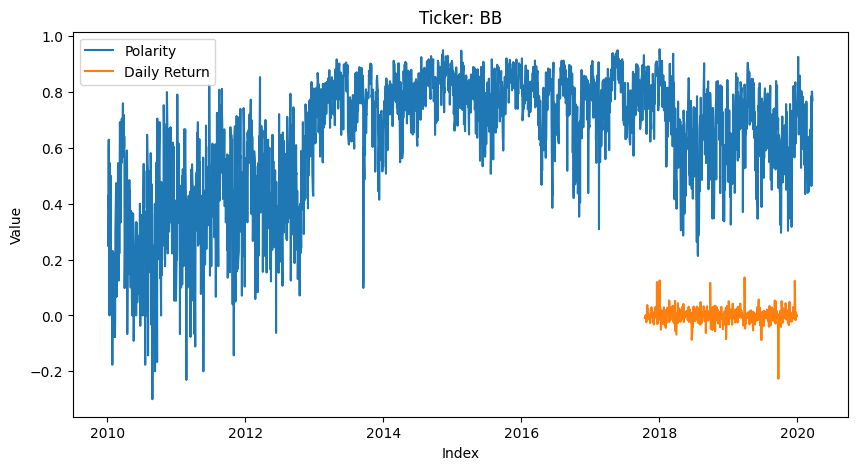

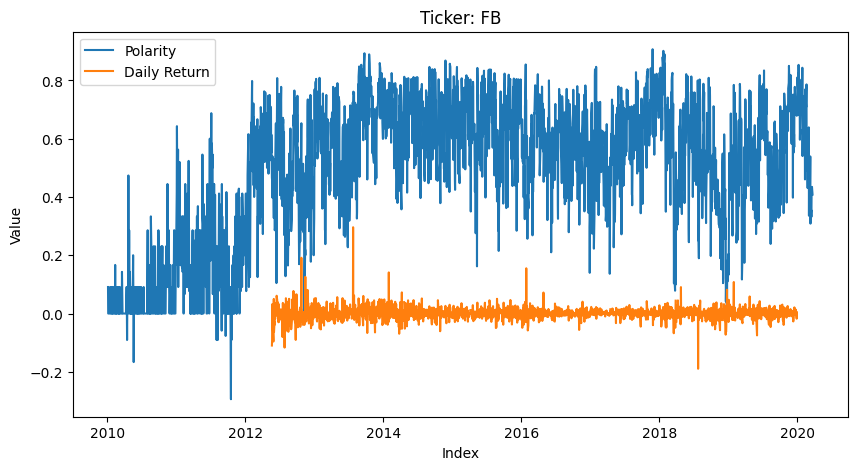

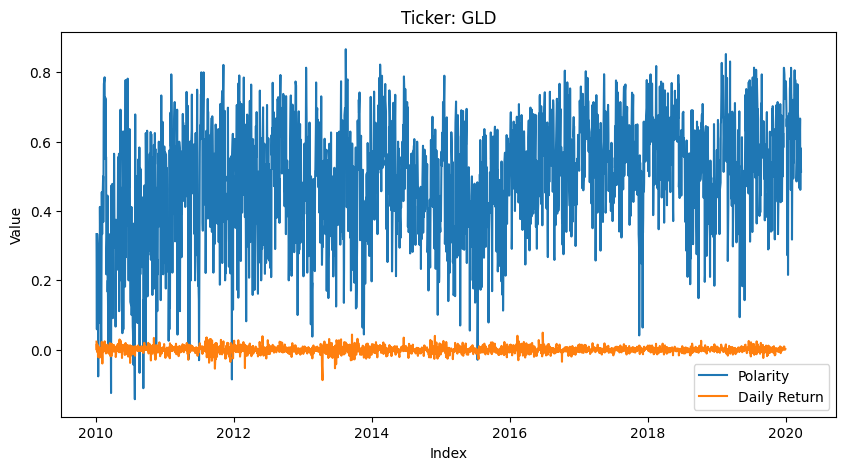

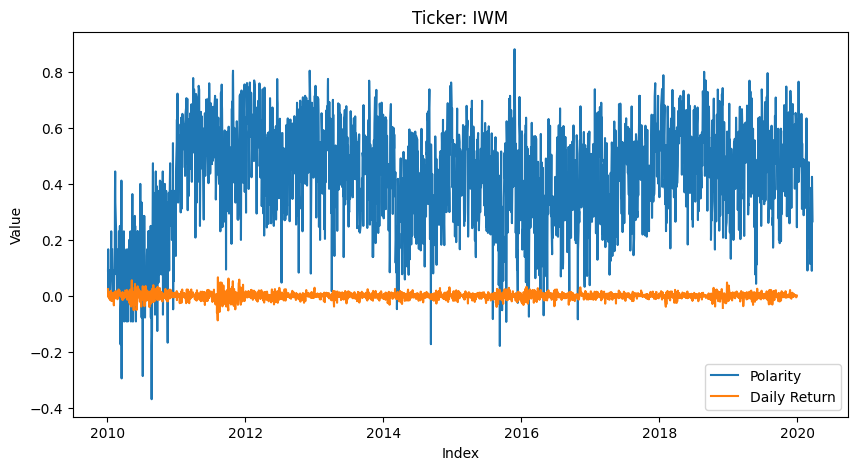

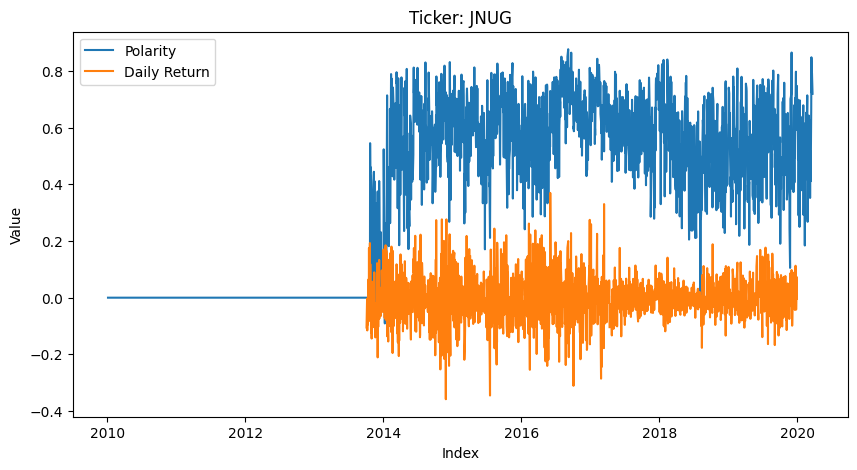

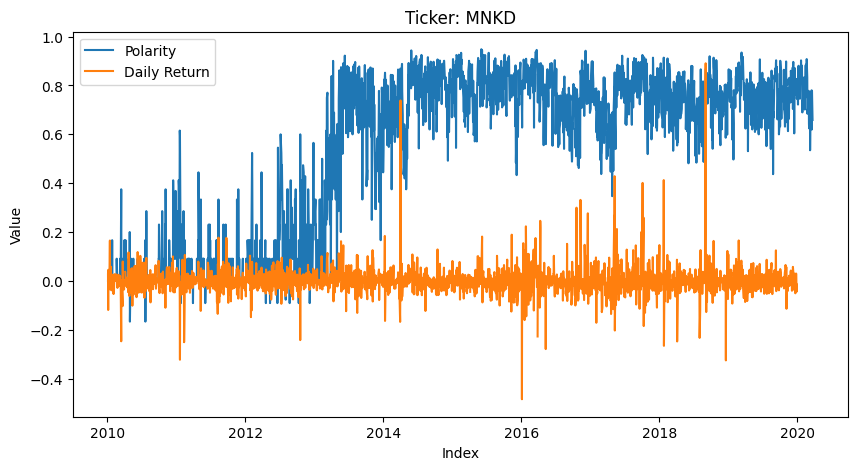

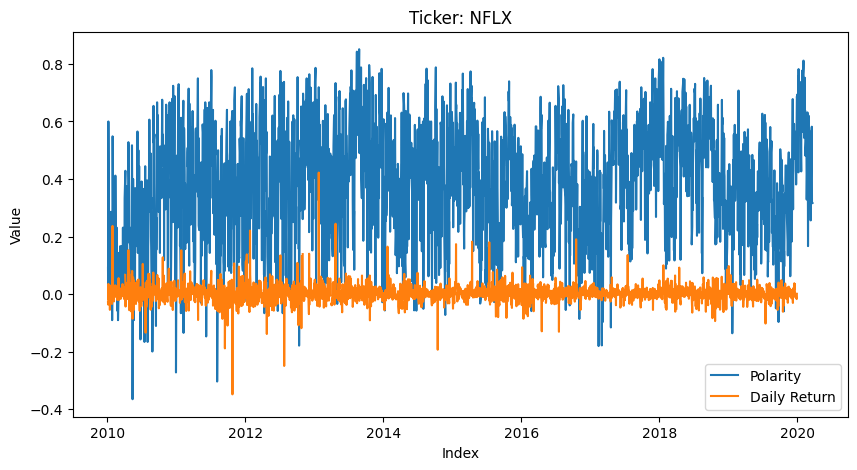

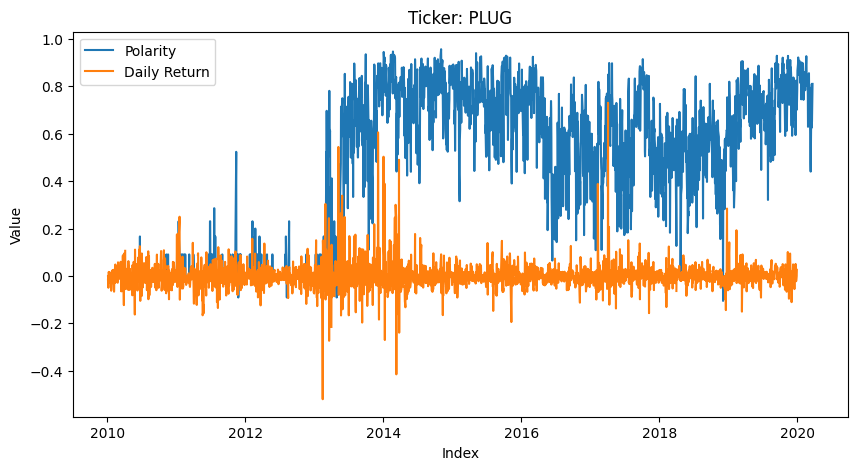

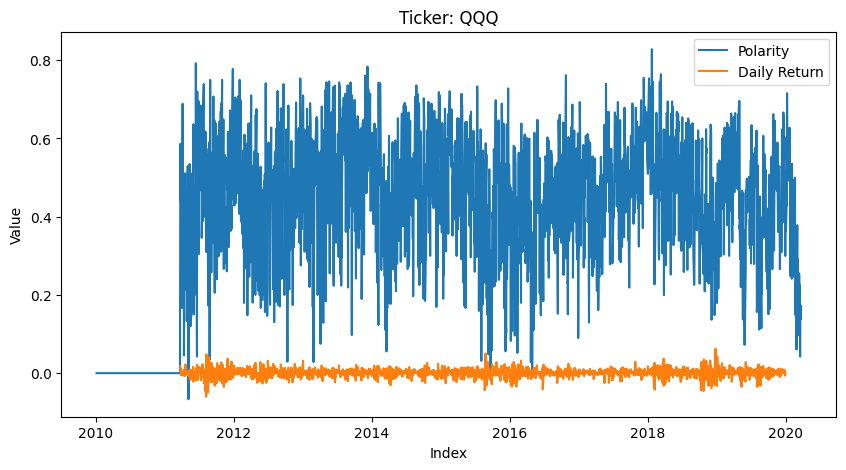

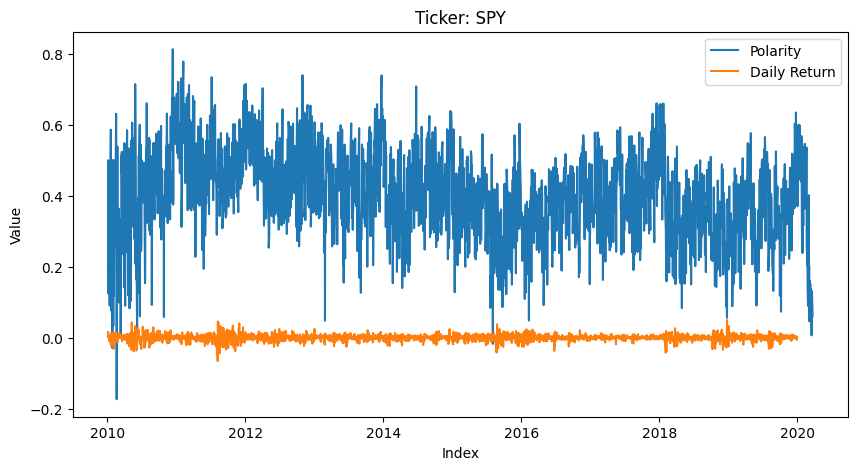

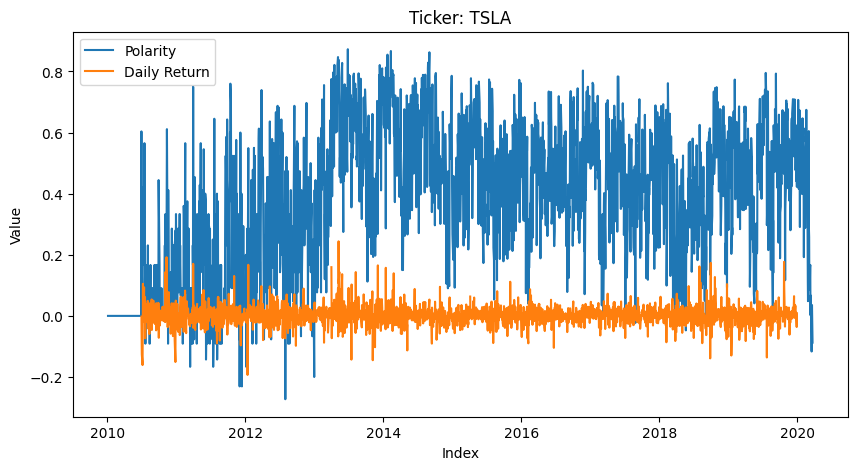

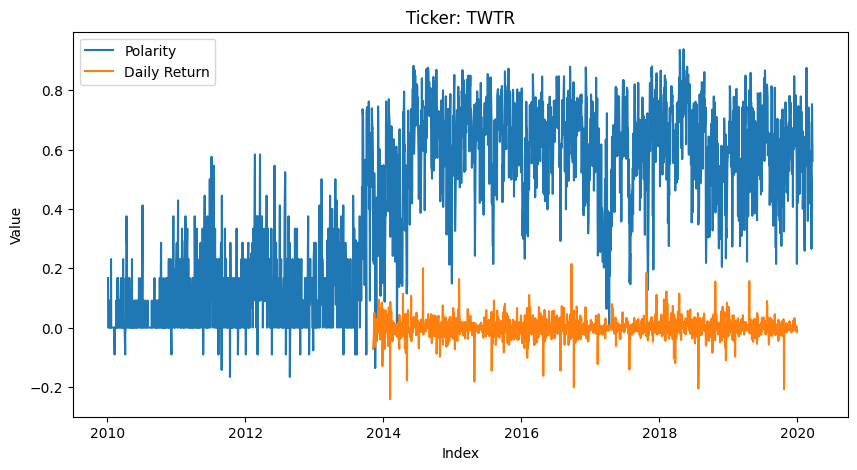

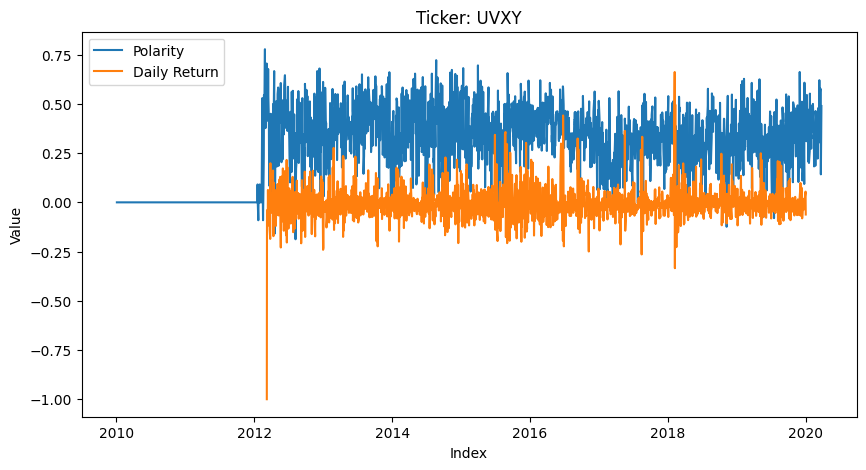

In [31]:
for ticker in data['ticker'].unique():
    plt.figure(figsize=(10, 5))
    plt.plot(data[data['ticker'] == ticker]['Polarity'], label='Polarity')
    plt.plot(data[data['ticker'] == ticker]['daily_return'], label='Daily Return')
    plt.title(f'Ticker: {ticker}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.show()


# Regressions

Regression of polarity on returns with all tickers

In [42]:
# Filtering out any rows where 'daily_return' or 'Polarity' might be NaN
data_filtered = data[['Polarity', 'daily_return']].dropna()

# Defining the independent variable (X) and adding a constant to it
X = sm.add_constant(data_filtered['Polarity'])
y = data_filtered['daily_return']

# Fitting the model
model = sm.OLS(y, X).fit()

# Printing the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           daily_return   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     331.6
Date:              mar., 29 oct. 2024   Prob (F-statistic):           8.37e-74
Time:                        18:07:12   Log-Likelihood:                 71871.
No. Observations:               40815   AIC:                        -1.437e+05
Df Residuals:                   40813   BIC:                        -1.437e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0072      0.000    -14.973      0.0

Regression of polarity on returns for each ticker

In [41]:
for ticker in data['ticker'].unique():
    # Filtering out any rows where 'daily_return' or 'Polarity' might be NaN
    data_filtered = data[data['ticker']== ticker][['Polarity', 'daily_return']].dropna()

    # Defining the independent variable (X) and adding a constant to it
    X = sm.add_constant(data_filtered['Polarity'])
    y = data_filtered['daily_return']

    # Fitting the model
    model = sm.OLS(y, X).fit()

    # Printing the summary of the regression results
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           daily_return   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.031
Method:                 Least Squares   F-statistic:                     81.96
Date:              mar., 29 oct. 2024   Prob (F-statistic):           2.73e-19
Time:                        18:00:32   Log-Likelihood:                 6783.8
No. Observations:                2495   AIC:                        -1.356e+04
Df Residuals:                    2493   BIC:                        -1.355e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0116      0.001     -8.088      0.0